### Sustained Attention Response Time (SART) task ERP analysis: signal pre-processing
EEG signal filtering, artefact rejection, and segmenting based on the events.

In [1]:
# Import packages
import mne, os
import numpy as np
from cmath import nan
import matplotlib.pyplot as plt
import pandas as pd
from autoreject import (get_rejection_threshold, AutoReject)

# Set the default directory
os.chdir('/Users/tanijarv/Documents/GitHub/EEG-pyline')
mne.set_log_level('error')

# Import functions
import signal_processing.pre_process as prep
import basic.arrange_data as arrange

Define these variables!

In [2]:
# Folder where to get the raw EEG files
raw_folder = 'Data/Raw/'

# Folder where to export the clean epochs files
clean_folder = 'Data/Clean/'

# Sub-folder for the experiment (i.e. timepoint or group)
exp_folder = 'LEISURE/T1/SART'

# EOG + mastoid channels and stimulus channel
eog_channels = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
stimulus_channel = 'Status'

# Parameters for filter design
filter_design = dict(l_freq=1, h_freq=15, filter_length='auto', method='fir',
                     l_trans_bandwidth='auto', h_trans_bandwidth='auto',
                     phase='zero', fir_window='hamming', fir_design='firwin')

# Epoch time window from event/stimuli
tminmax = [-0.2, 0.8]

# Baseline correction time window
baseline_correction = (None,0)

# Event names (i.e. different stimuli) within the epochs and their IDs
event_dict = {'target after 1 standard': 17, 'target after 3 standards': 19,
              'target after 5 standards': 21, 'target after 7 standards': 23,
              'target after 9 standards': 25, 'target after 11 standards': 27}

# Target tone IDs
target_ids = [17, 19, 21, 23, 25, 27]

# Button press ID
button_id = 32

# Print more information
verbose = False

Run this to set the folders for data.

In [3]:
# Get directories of raw EEG files and set export directory for clean files
dir_inprogress = os.path.join(raw_folder,exp_folder)
export_dir = os.path.join(clean_folder,exp_folder)
file_dirs, subject_names = arrange.read_files(dir_inprogress,'.bdf')

Files in Data/Raw/LEISURE/T1/SART read in: 7


Run this to pre-process the raw EEG files to clean epochs objects.

HBA_0121_SART_T1


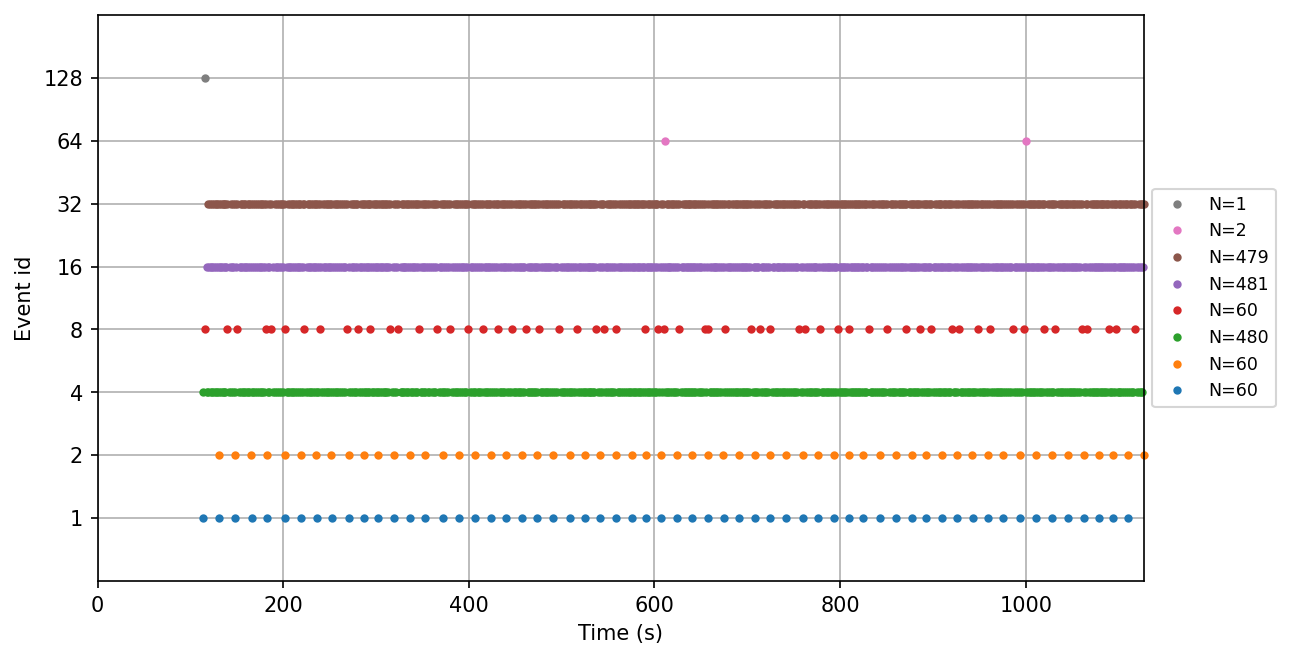

HBA_0122_SART_T1


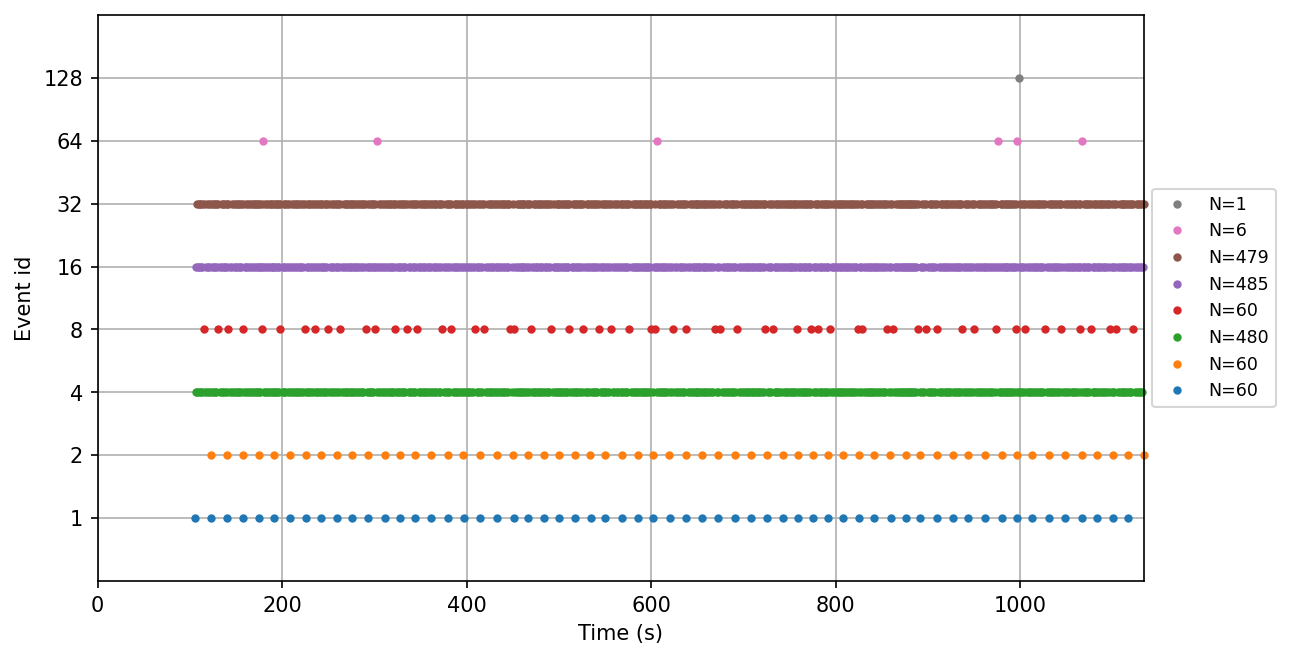

HBA_0124_SART_T1


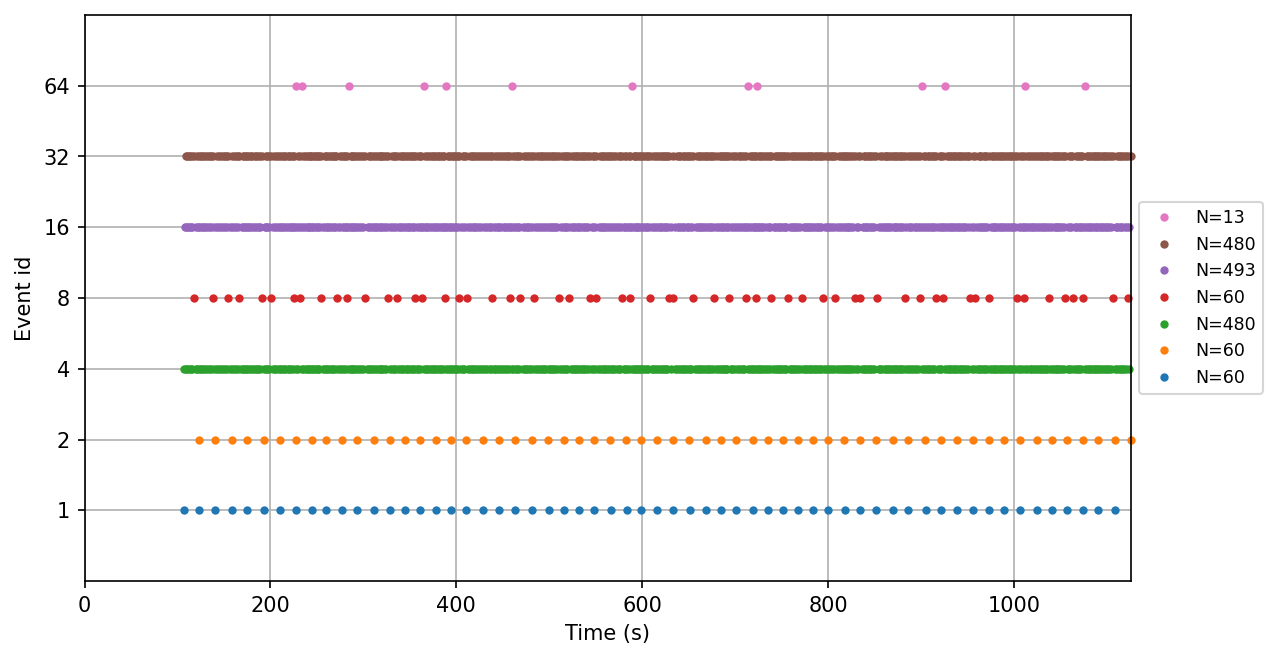

In [5]:
# Loop through all the subjects' directories (EEG files directories)
for i in range(3):#len(file_dirs)):
        print(subject_names[i])
        # Read in the raw EEG data
        raw = mne.io.read_raw_bdf(file_dirs[i], infer_types=True, eog=eog_channels,
                                  stim_channel=stimulus_channel).drop_channels(['Erg1'])

        # Set the right montage (Biosemi32) and set reference as average across all channels
        raw = raw.set_montage(mne.channels.make_standard_montage('biosemi32')).load_data()\
                 .set_eeg_reference(ref_channels='average', verbose=verbose)
    
        # Filter the signal with bandpass filter and remove EOG artefacts with SSP
        filt = prep.filter_raw_data(raw,filter_design, line_remove=None, eog_channels=eog_channels,
                                    plot_filt=False, savefig=False, verbose=False)
        
        # Find events from the filtered EEG data and name them
        events = mne.find_events(filt, stim_channel=stimulus_channel, consecutive=False, output='onset')
        buttontarget_events = []

        # # Create an array of target tone events which have been responded with a button press
        # for m in range(len(events)):
        #         for n in target_ids:
        #                 if events[m][2] == n and events[m+1][2] == button_id:
        #                         buttontarget_events.append(events[m])
        # buttontarget_events = np.asarray(buttontarget_events)
        
        # Plot all the events
        %matplotlib inline
        fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
        fig = mne.viz.plot_events(events, sfreq=filt.info['sfreq'],
                                  first_samp=filt.first_samp, axes=axs)
        # fig = mne.viz.plot_events(buttontarget_events, sfreq=filt.info['sfreq'],
        #                         first_samp=filt.first_samp, event_id=event_dict)
        fig.subplots_adjust(right=0.7)

        # # Create epochs time-locked to target tone events which are followed by button press
        # picks = mne.pick_types(filt.info, eeg=True, stim=False)
        # epochs = mne.Epochs(filt, buttontarget_events, event_id=event_dict, tmin=tminmax[0],
        #                     tmax=tminmax[1], baseline=baseline_correction, picks=picks, preload=True)
        
        # # Plot the epochs' GFP plot before artefact rejection
        # epochs.plot_image(title="GFP without AR ({})".format(subject_names[i]))

        # # Use AutoReject to repair and remove epochs which are artefactual
        # reject_criteria = get_rejection_threshold(epochs)
        # print('Dropping epochs with rejection threshold:',reject_criteria)
        # epochs.drop_bad(reject=reject_criteria)

        # ar = AutoReject(thresh_method='random_search', random_state=1)
        # ar.fit(epochs)
        # epochs_ar, reject_log = ar.transform(epochs, return_log=True)

        # reject_log.plot('horizontal')

        # # Plot the epochs' GFP after artefact rejection
        # epochs_ar.average().plot()
        # epochs_ar.plot_image(title="GFP with AR ({})".format(subject_names[i]))

        # # Display the final epochs object meta-data
        # display(epochs_ar)

        # # Save the cleaned EEG file as .fif file
        # try:
        #         os.makedirs(export_dir)
        # except FileExistsError:
        #         pass
        # try:
        #         mne.Epochs.save(epochs_ar, fname='{}/{}_clean-epo.fif'.format(export_dir,
        #                                                                       subject_names[i]),
        #                                                                       overwrite=True)
        # except FileExistsError:
        #         pass

In [ ]:
events

array([[ 116582,       0,       1],
       [ 116701,       0,       4],
       [ 118613,       0,     128],
       ...,
       [1153144,       0,      16],
       [1154131,       0,      32],
       [1154251,       0,       2]])